## Compare models

In [1]:
import warnings, os, sys, glob, nltools, scipy, matplotlib
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

import numpy as np
import pandas as pd
from scipy import stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42 

sys.path.append('../Tools/')
import FigureTools
from nltools.stats import one_sample_permutation

base_dir = '/project/3014018.02/analysis_mri/DataSharingCollection/'

/home/decision/jervbaa/.conda/envs/hmtg_fmri_nc/lib/python2.7/site-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ufuncs import *
/home/decision/jervbaa/.conda/envs/hmtg_fmri_nc/lib/python2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/home/decision/jervbaa/.conda/envs/hmtg_fmri_nc/lib/python2.7/site-packages/scipy/linalg/__init__.py:207: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/home/decision/jervbaa/.conda/envs/hmtg_fmri_nc/lib/python2.7/site-packages/scipy/special/_ellip_harm.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ellip_harm_2 import _ellipsoid, _ellipsoid_norm
/home/decision/jervbaa/.con

/home/decision/jervbaa/.conda/envs/hmtg_fmri_nc/lib/python2.7/site-packages/sklearn/linear_model/base.py:35: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ..utils.seq_dataset import ArrayDataset, CSRDataset
/home/decision/jervbaa/.conda/envs/hmtg_fmri_nc/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:23: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ..utils import arrayfuncs, as_float_array, check_X_y, deprecated
/home/decision/jervbaa/.conda/envs/hmtg_fmri_nc/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:29: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import cd_fast
/home/decision/jervbaa/.conda/envs/hmtg_fmri_nc/lib/python2.7/site-packages/sklearn/linear_model/__init__.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected

## Compare models (fig 2C)

In [2]:
first_bests_all = pd.read_csv(os.path.join(base_dir,'Results/1.Behavior-FitModels/First_bests_all.csv'),
                             index_col=0)

In [3]:
datUse = first_bests_all

In [7]:
metric = 'AIC'
model1s = ['GR','GA','IA']
model2 = 'MP_ppSOE'
dat2 = datUse.loc[(datUse['model']==model2) & (datUse['SSE']>0),metric]
print('Mean AIC for %s = %.2f'%(model2,np.mean(dat2)))
for model1 in model1s:
    dat1 = datUse.loc[(datUse['model']==model1) & (datUse['SSE']>0),metric]
    stats = scipy.stats.ttest_rel(dat1,dat2)
    stats_nonparam = one_sample_permutation(np.subtract(dat1,dat2),n_permute=100000)
    print('Compare model %s, n = %i, mean AIC = %.2f, t = %.2f, p = %.4f, perm-p = %.4f'%
          (model1,len(dat1),np.mean(dat1),stats[0],stats[1],stats_nonparam['p']))

Mean AIC for MP_ppSOE = 103.89
Compare model GR, n = 56, mean AIC = 333.22, t = 25.41, p = 0.0000, perm-p = 0.0000
Compare model GA, n = 56, mean AIC = 186.22, t = 11.20, p = 0.0000, perm-p = 0.0000
Compare model IA, n = 56, mean AIC = 115.13, t = 2.38, p = 0.0208, perm-p = 0.0177


/home/decision/jervbaa/.conda/envs/hmtg_fmri_nc/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


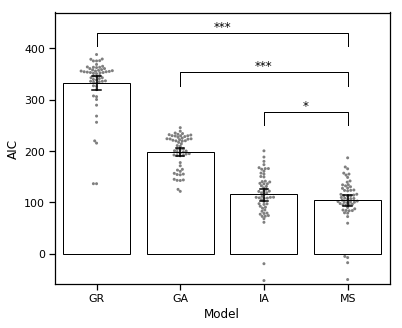

In [5]:
sns.set_context('notebook')
metric = 'AIC'
fig,ax = plt.subplots(1,1,figsize=[6,5],frameon=False)
order = ['GR','GA_ppSOE','IA','MP_ppSOE']
sns.barplot(data=datUse.loc[datUse['SSE']>10],x='model',y=metric,
            alpha=1,errwidth=0,zorder=1,order=order,color='w',edgecolor='k',linewidth=1)
sns.swarmplot(data=datUse.loc[datUse['SSE']>10],x='model',y=metric,
              alpha=.5,s=3,zorder=2,order=order,color='k')
sns.barplot(data=datUse.loc[datUse['SSE']>10],x='model',y=metric,
            alpha=0,errwidth=1.5,capsize=.1,errcolor='k',zorder=3,
            order=order)
plt.xticks(range(4),['GR','GA','IA','MS'])
plt.xlabel('Model')
FigureTools.add_sig_markers(ax,relationships=[[2,3,stats[1]],[1,3,0],[0,3,0]],
                            ystart=250,distScale=1.2)
plt.ylim([-60,470])
plt.savefig(os.path.join(base_dir,'Results/1.Behavior-FitModels/ModelComparisons.pdf'),
            transparent=True,bbox_inches='tight')

## Plot participants in parameter space

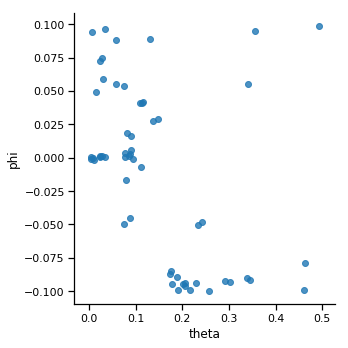

In [6]:
sns.lmplot(data = datUse.loc[(datUse['model']=='MP_ppSOE'),['theta','phi']],
           x = 'theta', y = 'phi', fit_reg = False)

## Model comparison incl model with self-reported second-order expectations (supp. fig. 11)

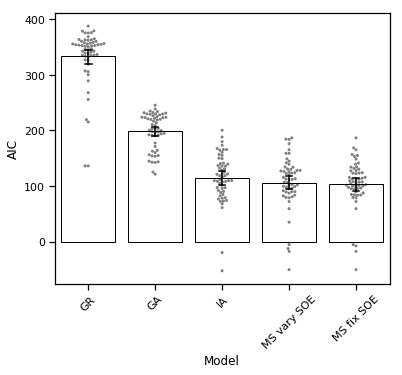

In [7]:
sns.set_context('notebook')
metric = 'AIC'
fig,ax = plt.subplots(1,1,figsize=[6,5],frameon=False)
order = ['GR','GA_ppSOE','IA','MP','MP_ppSOE']
sns.barplot(data=datUse.loc[datUse['SSE']>10],x='model',y=metric,
            alpha=1,errwidth=0,zorder=1,order=order,color='w',edgecolor='k',linewidth=1)
sns.swarmplot(data=datUse.loc[datUse['SSE']>10],x='model',y=metric,
              alpha=.5,s=3,zorder=2,order=order,color='k')
sns.barplot(data=datUse.loc[datUse['SSE']>10],x='model',y=metric,
            alpha=0,errwidth=1.5,capsize=.1,errcolor='k',zorder=3,
            order=order)
plt.xticks(range(len(order)),['GR','GA','IA','MS vary SOE','MS fix SOE'],rotation=45)
plt.xlabel('Model')
plt.savefig(os.path.join(base_dir,'Results/1.Behavior-FitModels/ModelComparisons_VarySOE.pdf'),
            transparent=True,bbox_inches='tight')

## Model comparison in replication sample (supp. fig. 4A)

In [11]:
rep_dat = pd.read_csv(os.path.join(base_dir,
       'Data/7.BehavioralReplication/ModelFits.csv'),
                             index_col=0)

In [12]:
rep_dat.head()

,sub,model,theta,phi,SSE,AIC
0,1,GR,NaN,NaN,7533.0,349.319963
1,1,GA,356.529191,NaN,756.0,176.595411
2,1,IA,251.378808,NaN,169.0,62.736568
3,1,MP,0.022657,0.000664,130.0,44.796884
4,1,MP_ppSOE,0.067945,0.001722,164.0,62.454115


In [13]:
metric = 'AIC'
model1s = ['GR','GA','IA']
model2 = 'MP_ppSOE'
perfectFitSubs = np.unique(rep_dat.loc[rep_dat['SSE']==0,'sub'])
datUse = rep_dat.loc[~rep_dat['sub'].isin(perfectFitSubs),:].copy()
dat2 = datUse.loc[(datUse['model']==model2),metric]
print('Mean AIC for %s = %.2f'%(model2,np.mean(dat2)))
for model1 in model1s:
    dat1 = datUse.loc[(datUse['model']==model1),metric]
    stats = scipy.stats.ttest_rel(dat1,dat2)
    stats_nonparam = one_sample_permutation(np.subtract(dat1,dat2),n_permute=10000)
    print('Compare model %s, n = %i, mean AIC = %.2f, dAIC = %.2f, t = %.2f, p = %.4f, perm-p = %.4f'%
          (model1,len(dat1),np.mean(dat1),np.mean(dat2) - np.mean(dat1), stats[0],stats[1],stats_nonparam['p']))

Mean AIC for MP_ppSOE = 107.57
Compare model GR, n = 98, mean AIC = 327.92, dAIC = -220.36, t = 24.62, p = 0.0000, perm-p = 0.0000
Compare model GA, n = 98, mean AIC = 183.61, dAIC = -76.04, t = 12.55, p = 0.0000, perm-p = 0.0000
Compare model IA, n = 98, mean AIC = 120.96, dAIC = -13.39, t = 2.65, p = 0.0095, perm-p = 0.0014


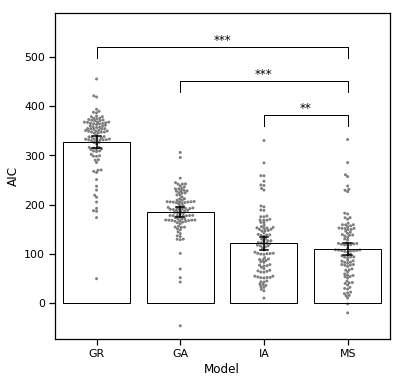

In [11]:
sns.set_context('notebook')
metric = 'AIC'
fig,ax = plt.subplots(1,1,figsize=[6,6],frameon=False)
order = ['GR','GA','IA','MP_ppSOE']
sns.barplot(data=rep_dat.loc[rep_dat['SSE']>10],x='model',y=metric,
            alpha=1,errwidth=0,zorder=1,order=order,color='w',edgecolor='k',linewidth=1)
sns.swarmplot(data=rep_dat.loc[rep_dat['SSE']>10],x='model',y=metric,
              alpha=.5,s=3,zorder=2,order=order,color='k')
sns.barplot(data=rep_dat.loc[rep_dat['SSE']>10],x='model',y=metric,
            alpha=0,errwidth=1.5,capsize=.1,errcolor='k',zorder=3,
            order=order)
plt.xticks(range(len(order)),['GR','GA','IA','MS'])
plt.xlabel('Model')
FigureTools.add_sig_markers(ax,relationships=[[2,3,stats_nonparam['p']],[1,3,0],[0,3,0]],
                            ystart=360,distScale=1.2)
plt.savefig(os.path.join(base_dir,'Results/1.Behavior-FitModels/ModelComparisons_Replication.pdf'),
            transparent=True,bbox_inches='tight')